# Dimensionality Reduction using Digits Dataset

The **Digits** dataset consists of 1,083 samples, which are 8x8 pixel images, flattened into vectors of 64 dimensions. These are images of handwritten digits from 0 to 9.

In this case study, we will work on this image data of handwritten digits and will visualize the images in two-dimensional space using the dimensionality reduction techniques - **PCA and t-SNE**.

We will generate scatter plots to visualize the implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from matplotlib import offsetbox
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
# Load the Digits dataset from Sklearn library
digits = datasets.load_digits()
X, y = digits.data, digits.target

## Comparing t-SNE and PCA

In [3]:
# Apply t-SNE
t0 = time()
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X)
t1 = time()
tsne_time = t1-t0
print("t-SNE-Embeddings in time {}".format(tsne_time),"\n", X_tsne, "\n")

# PCA of the digits dataset
t0 = time()
X_pca = PCA(n_components = 2).fit_transform(X)
t1 = time()
pca_time = t1-t0
print("PCA projections in time {}".format(pca_time), "\n", X_pca)

t-SNE-Embeddings in time 4.815178394317627 
 [[-46.051804    3.397229 ]
 [ -1.6193519  -4.921565 ]
 [ 18.73692     6.4240656]
 ...
 [  8.488317    3.7880337]
 [ -2.9835203  31.113054 ]
 [ 10.516954   13.01026  ]] 

PCA projections in time 0.06366562843322754 
 [[ -1.25946647  21.27488619]
 [  7.95760823 -20.76869018]
 [  6.99192444  -9.95599203]
 ...
 [ 10.80128554  -6.96025629]
 [ -4.87210531  12.42396974]
 [ -0.34438566   6.3655377 ]]


**Note:** 
- The time taken to generate t-SNE embeddings is much longer in comparison to the time taken to generate projections using PCA.

## Visualize the t-SNE output

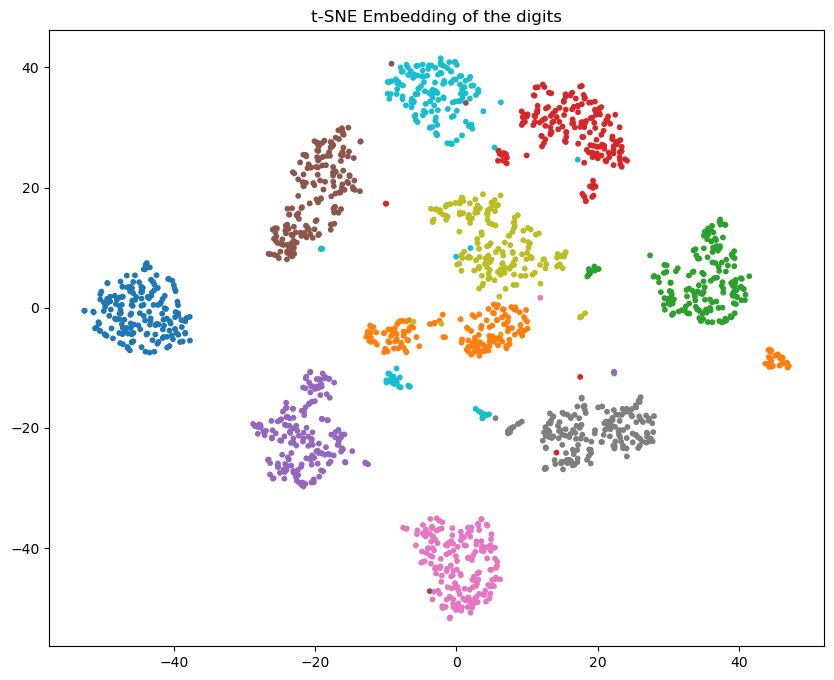

In [4]:
# Visualize the t-SNE output
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=10)
plt.title("t-SNE Embedding of the digits")
plt.show()

## Visualize the PCA output

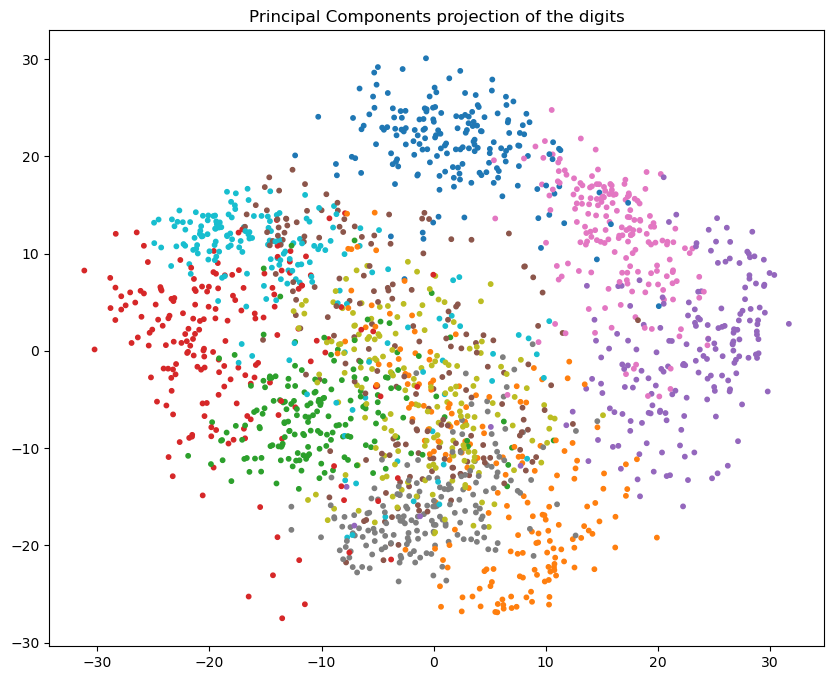

In [5]:
# Visualize the t-SNE output
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=10)
plt.title("Principal Components projection of the digits")
plt.show()

Now, let's use the **plot_embedding function** to get to a **more advanced visualization**. The clusters will still appear in the same way, but will be more informative with annotations.

**Note:** The following code taken from scikit-learn is meant to annotate the embeddings created by PCA and t-SNE and provide a more labeled and informative visualization.

In [9]:
# Scale and visualize the embedding vectors

def plot_embedding(X, title=None):              # Passing the embedded array and the title of the graph                                    
    # Find the max and min of the passed array
    x_min, x_max = np.min(X, 0), np.max(X, 0)   
    
    # Scale the array, new values are between 0 and 1
    X = (X - x_min) / (x_max - x_min)          

    # Set the figure size to a sufficiently large value
    plt.figure(figsize = (12, 12))               
    
    ax = plt.subplot(111)
    
    for i in range(X.shape[0]):
        
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 
                 color = plt.cm.Set1(y[i] / 10.),
                 
                 fontdict = {'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])      # Just something big
        
        for i in range(X.shape[0]):
            
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            
            if np.min(dist) < 4e-3:
                
                # don't show points that are too close
                continue
            
            shown_images = np.r_[shown_images, [X[i]]]
            
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.gray_r), X[i])
            
            ax.add_artist(imagebox)
    
    plt.xticks([]), plt.yticks([])
    
    if title is not None:
        
        plt.title(title)
    
    plt.show()

## Visualize the t-SNE output using plot_embedding function

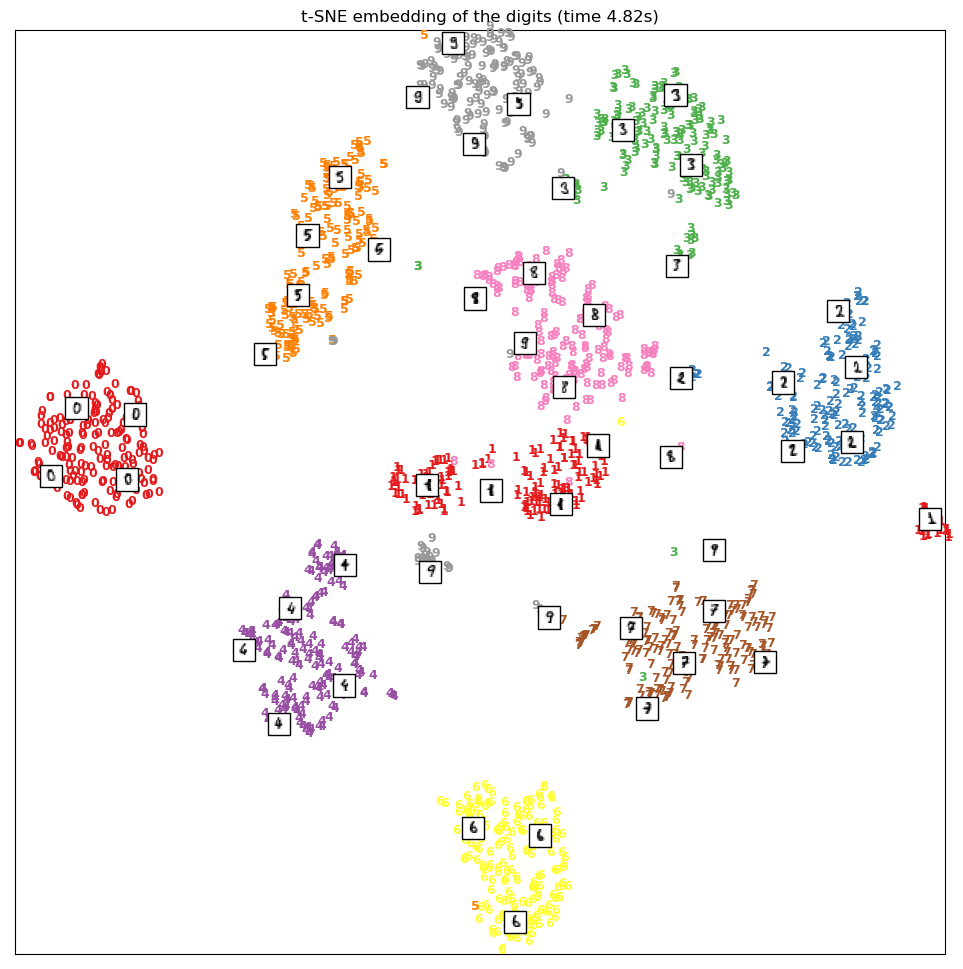

In [10]:
# Plotting t-SNE embeddings 
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (tsne_time))

## Visualize the PCA output using plot_embedding function

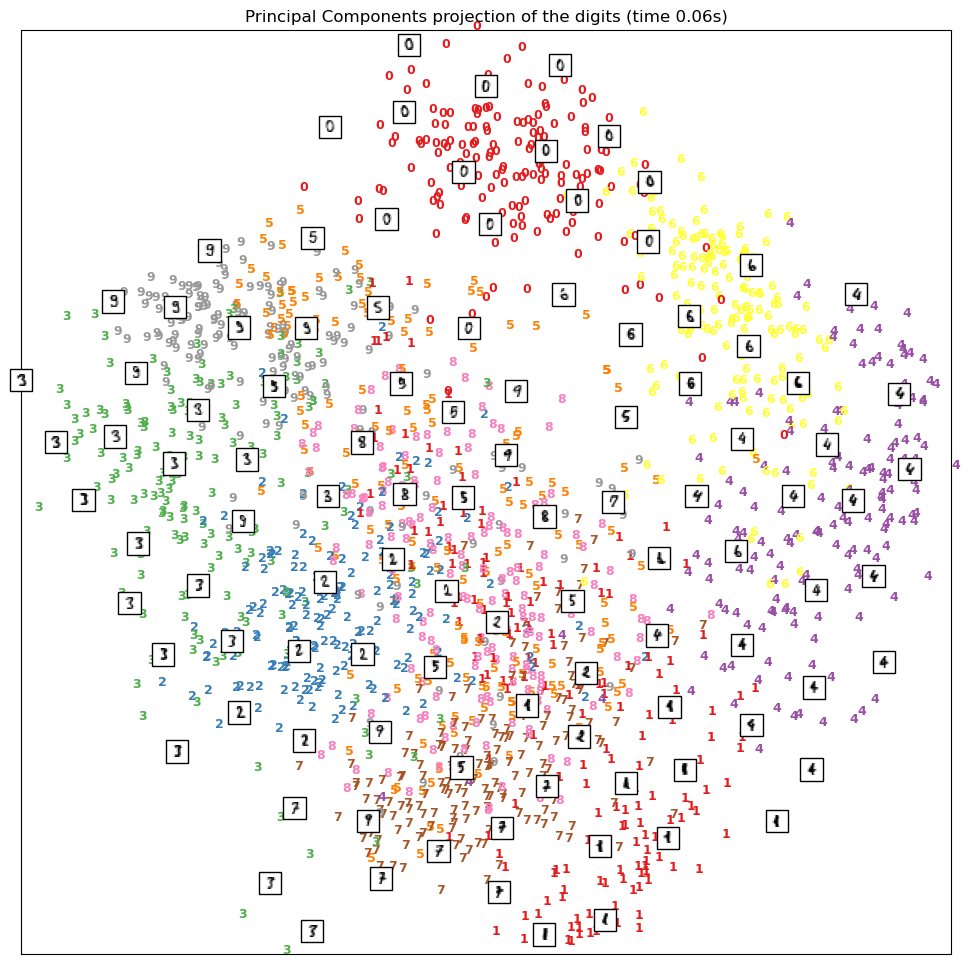

In [11]:
# Plotting PCA projections
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (pca_time))

## **Conclusion**

- We have effectively reduced the dimensionality of the images, from 64 to 2, using t-SNE and PCA, and plotted the 2D embeddings and projections.
- Out of the two methods used above, t-SNE takes a longer time to generate embeddings but gives better visualizations with well-separated clusters for each handwritten digit. 
- The annotations show that while PCA gives the same clusters, the overall plot represents more of a blob and is not as well-separated as t-SNE. 

- t-SNE is good for visualizing the data in lower dimensions but is very slow and should only be used on small datasets, whereas PCA is more computationally efficient and can be used on large datasets as well.